In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("C:\\Users\\hsrak\\OneDrive\\Desktop\\April\\NLP_Online\\raw_tweets_economy.txt", sep="\t")
df.head()

,Unnamed: 0,0
0,0,Stocks losses deepen as a key recession warnin...
1,1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...
2,2,AP Explains: Is the US economy nearing a reces...
3,3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...
4,4,Who will stop mr. Mario Draghi and the ECB wit...


In [4]:
df.shape

(500, 2)

##Drop the column '0', rename column '1' to 'tweet_data'

In [5]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [6]:
df.shape

(500, 1)

In [7]:
df.head()

,0
0,Stocks losses deepen as a key recession warnin...
1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...
2,AP Explains: Is the US economy nearing a reces...
3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...
4,Who will stop mr. Mario Draghi and the ECB wit...


Renaming the column

In [8]:
df = df.rename({'0':'tweet_data'}, axis=1)
df.head()

,tweet_data
0,Stocks losses deepen as a key recession warnin...
1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...
2,AP Explains: Is the US economy nearing a reces...
3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...
4,Who will stop mr. Mario Draghi and the ECB wit...


In [9]:
df.tweet_data.sample().values

array(['@panthera_s @mauldinecon #Americans expect the #economy to improve slightly in the near future.\r\n#consumer spending… https://t.co/t7B80NfWBW'],
      dtype=object)

#### Get the tweets into a list, for easy text clean up and manipulation

In [10]:
df_list = df.tweet_data.values

In [11]:
len(df_list)

500

In [12]:
df_list[:5]

array(['Stocks losses deepen as a key recession warning surfaces @GOP #economy #fail #collapse #recession #gop #greed… https://t.co/F8kazAixUk',
       "RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews @realDonaldTrump \r\n#Trump is an ejit.\r\n#maga #TrumpTrain2020 #sheeple are idiot's.\r\n#farming #Trad…",
       'AP Explains: Is the US economy nearing a recession? \r\n#Business\r\n#Economy\r\n#Recession\r\n#TradeWar\r\n#China\r\n#EU… https://t.co/0jtsR2kSxi',
       'A @JobCreatorsUSA / https://t.co/JXEt7hQU4k survey completed Tuesday, 56% rated the #economy as good or excellent,… https://t.co/j1XMiptADx',
       'Who will stop mr. Mario Draghi and the ECB with this counterproductive course of money dumping / zero interests? It… https://t.co/eweIrVuOK0'],
      dtype=object)

The tweets contain - 
1. URLs
2. Hashtags
3. User handles
4. 'RT'

## Cleanup 

#### Normalizing the data 

In [13]:
tweets_lower = [txt.lower() for txt in df_list]

In [14]:
tweets_lower[:5]

['stocks losses deepen as a key recession warning surfaces @gop #economy #fail #collapse #recession #gop #greed… https://t.co/f8kazaixuk',
 "rt @callmeahmjusayn: the #economy.\r\n@foxnews @realdonaldtrump \r\n#trump is an ejit.\r\n#maga #trumptrain2020 #sheeple are idiot's.\r\n#farming #trad…",
 'ap explains: is the us economy nearing a recession? \r\n#business\r\n#economy\r\n#recession\r\n#tradewar\r\n#china\r\n#eu… https://t.co/0jtsr2ksxi',
 'a @jobcreatorsusa / https://t.co/jxet7hqu4k survey completed tuesday, 56% rated the #economy as good or excellent,… https://t.co/j1xmiptadx',
 'who will stop mr. mario draghi and the ecb with this counterproductive course of money dumping / zero interests? it… https://t.co/eweirvuok0']

#### Remove user handles, begin with '@'

In [15]:
import re
#re.sub("\@\w+","", "@callmeahm jusayn: the #economy")

In [16]:
tweets_noat = [re.sub("@\w+","", txt) for txt in tweets_lower]

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\hsrak\AppData\Local\Temp\ipykernel_144944\3476010925.py:1: SyntaxWarning: invalid escape sequence '\w'
  tweets_noat = [re.sub("@\w+","", txt) for txt in tweets_lower]


In [17]:
tweets_noat[:5]

['stocks losses deepen as a key recession warning surfaces  #economy #fail #collapse #recession #gop #greed… https://t.co/f8kazaixuk',
 "rt : the #economy.\r\n  \r\n#trump is an ejit.\r\n#maga #trumptrain2020 #sheeple are idiot's.\r\n#farming #trad…",
 'ap explains: is the us economy nearing a recession? \r\n#business\r\n#economy\r\n#recession\r\n#tradewar\r\n#china\r\n#eu… https://t.co/0jtsr2ksxi',
 'a  / https://t.co/jxet7hqu4k survey completed tuesday, 56% rated the #economy as good or excellent,… https://t.co/j1xmiptadx',
 'who will stop mr. mario draghi and the ecb with this counterproductive course of money dumping / zero interests? it… https://t.co/eweirvuok0']

#### Remove URLs

In [18]:
re.sub("\w+://\S+","", "@Rahim this course rocks! http://rahimbaig.com/ai")

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\hsrak\AppData\Local\Temp\ipykernel_144944\399894764.py:1: SyntaxWarning: invalid escape sequence '\w'
  re.sub("\w+://\S+","", "@Rahim this course rocks! http://rahimbaig.com/ai")


'@Rahim this course rocks! '

In [19]:
tweets_nourl = [re.sub("\w+://\S+","", twt) for twt in tweets_noat]

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\hsrak\AppData\Local\Temp\ipykernel_144944\3381990314.py:1: SyntaxWarning: invalid escape sequence '\w'
  tweets_nourl = [re.sub("\w+://\S+","", twt) for twt in tweets_noat]


In [20]:
tweets_nourl[:5]

['stocks losses deepen as a key recession warning surfaces  #economy #fail #collapse #recession #gop #greed… ',
 "rt : the #economy.\r\n  \r\n#trump is an ejit.\r\n#maga #trumptrain2020 #sheeple are idiot's.\r\n#farming #trad…",
 'ap explains: is the us economy nearing a recession? \r\n#business\r\n#economy\r\n#recession\r\n#tradewar\r\n#china\r\n#eu… ',
 'a  /  survey completed tuesday, 56% rated the #economy as good or excellent,… ',
 'who will stop mr. mario draghi and the ecb with this counterproductive course of money dumping / zero interests? it… ']

In [21]:
tweets_nourl[-5:]

['rt : . has transformed (and expanded) the republican party, making it the party of blue collar working america…',
 'rt : #lebanon #beirut #politics #economy #commerce #funny #daily #media #crazy #science #food\r\n',
 'rt : . has transformed (and expanded) the republican party, making it the party of blue collar working america…',
 "rt : rt.'s #facts #thread\r\n1). blames u.s. sanctions for #iran’s crumbling #economy. #blacklistirgc #corrupti…",
 '#primeminister  commits to pumping 1.4$tr into the #economy of #india via #infrastructure projects .… ']

#### Extracting only the hashtags from the tweets - remember, we want to analyse the most common hashtags in the tweets

In [22]:
re.findall("#\w+","I love this #love #life and fun")

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\hsrak\AppData\Local\Temp\ipykernel_144944\1344710272.py:1: SyntaxWarning: invalid escape sequence '\w'
  re.findall("#\w+","I love this #love #life and fun")


['#love', '#life']

In [23]:
hashtags = [re.findall('#\w+',twt) for twt in tweets_nourl]

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\hsrak\AppData\Local\Temp\ipykernel_144944\3289847013.py:1: SyntaxWarning: invalid escape sequence '\w'
  hashtags = [re.findall('#\w+',twt) for twt in tweets_nourl]


In [24]:
hashtags[:5]

[['#economy', '#fail', '#collapse', '#recession', '#gop', '#greed'],
 ['#economy',
  '#trump',
  '#maga',
  '#trumptrain2020',
  '#sheeple',
  '#farming',
  '#trad'],
 ['#business', '#economy', '#recession', '#tradewar', '#china', '#eu'],
 ['#economy'],
 []]

### combining all hastags

In [25]:
#Declaring an empty list which will later contain all the hashtags
all_hashtags = []

In [26]:
for a in hashtags:
    all_hashtags.extend(a)

In [27]:
all_hashtags[:5]

['#economy', '#fail', '#collapse', '#recession', '#gop']

In [28]:
len(all_hashtags)

1061

#### Removing '#economy' from the data, as this is what the tweets are about

In [29]:
#stop_contextual = ['#economy']

#### Removing the contextual stopwords

In [30]:
#all_hashtags = [tag for tag in all_hashtags if tag not in stop_contextual]

In [31]:
len(all_hashtags)

1061

In [32]:
all_hashtags[:5]

['#economy', '#fail', '#collapse', '#recession', '#gop']

#### Using a counter to get the top hashtags

In [33]:
from collections import Counter

In [34]:
counts_hashtags = Counter(all_hashtags)
counts_hashtags

Counter({'#economy': 246,
         '#recession': 24,
         '#india': 20,
         '#business': 18,
         '#hongkong': 17,
         '#bloomberg': 15,
         '#china': 12,
         '#trump': 10,
         '#markets': 9,
         '#economics': 9,
         '#infrastructure': 9,
         '#world': 8,
         '#primeminister': 8,
         '#bitcoin': 7,
         '#technology': 7,
         '#politics': 7,
         '#bjp': 7,
         '#resistance': 7,
         '#tradewar': 6,
         '#finance': 6,
         '#rttnews': 6,
         '#government': 6,
         '#stockmarket': 6,
         '#trumpslump': 6,
         '#tradewars': 6,
         '#news': 5,
         '#traitortrump': 5,
         '#deficits': 5,
         '#trumpslum': 5,
         '#investing': 5,
         '#global': 5,
         '#investment': 4,
         '#dogfood': 4,
         '#sales': 4,
         '#happy': 4,
         '#cute': 4,
         '#cr17': 4,
         '#tonygeorgiades': 4,
         '#fwdeklerk': 4,
         '#armsdea

In [35]:
len(counts_hashtags)

388

In [36]:
counts_hashtags.most_common(10)

[('#economy', 246),
 ('#recession', 24),
 ('#india', 20),
 ('#business', 18),
 ('#hongkong', 17),
 ('#bloomberg', 15),
 ('#china', 12),
 ('#trump', 10),
 ('#markets', 9),
 ('#economics', 9)]

#### Plotting the top 10 hashtags

In [37]:
import matplotlib.pyplot as plt

In [38]:
map = counts_hashtags.most_common(10)

In [39]:
map1 = {term:cnt for term,cnt in map} # creating the dic 

In [40]:
list(map1.keys())

['#economy',
 '#recession',
 '#india',
 '#business',
 '#hongkong',
 '#bloomberg',
 '#china',
 '#trump',
 '#markets',
 '#economics']

In [41]:
list(map1.values())

[246, 24, 20, 18, 17, 15, 12, 10, 9, 9]

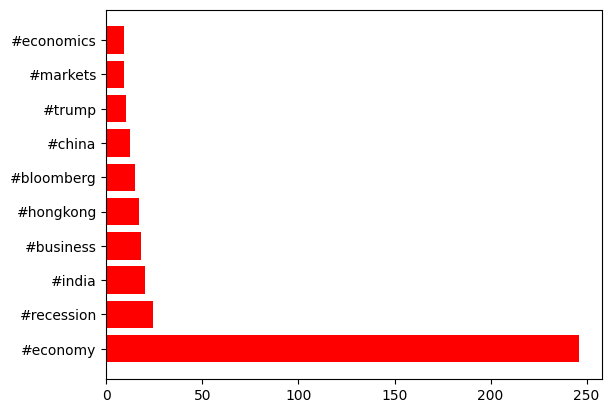

In [42]:
plt.barh(list(map1.keys()), list(map1.values()), color="red")
plt.show()